In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
data=pd.read_csv("diamonds_new.csv")

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [6]:
data[['cut', 'color', 'clarity']]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [7]:
data.shape

(53940, 9)

In [8]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [9]:
zero_index=data[(data['x']==0 )|(data['y']==0)|(data['z']==0)].index

In [10]:
zero_index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [11]:
data1=data.drop(zero_index)

In [12]:
data1.shape

(53932, 9)

In [13]:
#outliers

Text(0.5, 1.0, 'Boxplot of x')

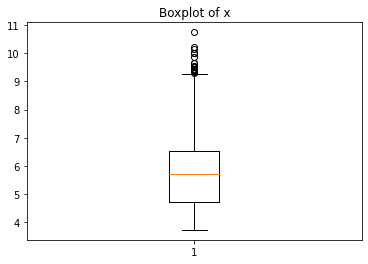

In [14]:
plt.boxplot(data1['x'])
plt.title('Boxplot of x')

Text(0.5, 1.0, 'Boxplot of y')

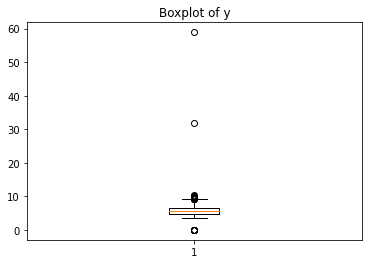

In [15]:
plt.boxplot(data['y'])
plt.title('Boxplot of y')

Text(0.5, 1.0, 'Boxplot of z')

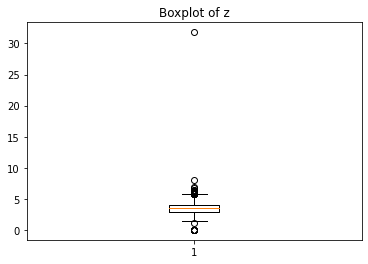

In [16]:
plt.boxplot(data['z'])
plt.title('Boxplot of z')

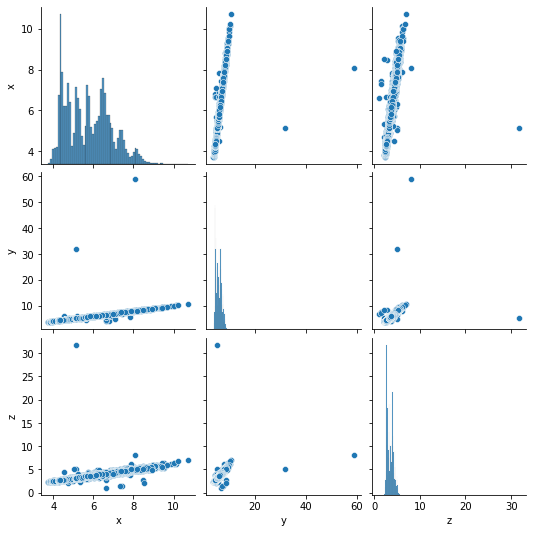

In [17]:
sns.pairplot(data1[['x','y','z']])
plt.show()

In [18]:
data1[data1['y']>30].index

Int64Index([24067, 49189], dtype='int64')

In [19]:
data1[data1['z']>30].index

Int64Index([48410], dtype='int64')

In [20]:
data2=data1.drop([24067,49189,48410])

In [21]:
data2.describe()

,carat,table,x,y,z,price_new
count,53830.000000,53866.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.798048,57.457669,5.731986,5.733796,3.539523,1966.026702
std,0.474385,2.235320,1.119649,1.111501,0.691693,1994.334768
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.000000
max,5.010000,95.000000,10.740000,10.540000,6.980000,9411.500000


# Missing values

In [23]:
data2.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [24]:
for i in ['carat', 'table','x', 'y', 'z',
       'price_new']: 
    data2[i] = data2[i].fillna(data2[i].median())

In [25]:
data2.isna().sum()

carat         0
cut           0
color        56
clarity       0
table         0
x             0
y             0
z             0
price_new     0
dtype: int64

In [26]:
data2.drop('color',axis=1,inplace=True)

In [27]:
data2.isna().sum()

carat        0
cut          0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

# Encoding

In [28]:
data2.head()

,carat,cut,clarity,table,x,y,z,price_new
0,0.23,Ideal,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,SI2,58.0,4.34,4.35,2.75,167.5


In [29]:
data2.isna().sum()

carat        0
cut          0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder=LabelEncoder()

In [32]:
data2['cut']=label_encoder.fit_transform(data2['cut'])

In [33]:
data2.head()

,carat,cut,clarity,table,x,y,z,price_new
0,0.23,2,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,3,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,1,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,3,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,1,SI2,58.0,4.34,4.35,2.75,167.5


In [34]:
data2['clarity']=label_encoder.fit_transform(data2['clarity'])

In [35]:
data2.head()

,carat,cut,clarity,table,x,y,z,price_new
0,0.23,2,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,2,61.0,3.89,3.84,2.31,163.0
2,0.23,1,4,65.0,4.05,4.07,2.31,163.5
3,0.29,3,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,3,58.0,4.34,4.35,2.75,167.5


In [36]:
x=data2.drop('price_new',axis=1)
y=data2['price_new']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

In [40]:
print('Mean Squared Error is:', mean_squared_error(y_test,predictions)) 
print('R Squared value is:',r2_score(y_test,predictions))

Mean Squared Error is: 493227.076682886
R Squared value is: 0.874898247819127


# MinMaxscaling

In [41]:
x.describe()

,carat,cut,clarity,table,x,y,z
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.797868,2.553061,3.835135,57.457134,5.731986,5.733796,3.539523
std,0.473967,1.027659,1.724708,2.234069,1.119649,1.111501,0.691693
min,0.200000,0.000000,0.000000,43.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,4.000000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,5.000000,59.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,7.000000,95.000000,10.740000,10.540000,6.980000


In [42]:
x1=x.drop(['cut','clarity'],axis=1)

In [43]:
x1

,carat,table,x,y,z
0,0.23,55.0,3.95,3.98,2.43
1,0.21,61.0,3.89,3.84,2.31
2,0.23,65.0,4.05,4.07,2.31
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75
...,...,...,...,...,...
53935,0.72,57.0,5.75,5.76,3.50
53936,0.72,55.0,5.69,5.75,3.61
53937,0.70,60.0,5.66,5.68,3.56
53938,0.86,58.0,6.15,6.12,3.74


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
x1=min_max_scaler.fit_transform(x1)

In [47]:
type(x1)

numpy.ndarray

In [48]:
x1=pd.DataFrame(x1,columns=['carat','table','x','y','z'])

In [49]:
x1.describe()

,carat,table,x,y,z
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.124297,0.278022,0.285590,0.299387,0.417855
std,0.098538,0.042963,0.159722,0.162026,0.117038
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.250000,0.139800,0.151603,0.311337
50%,0.103950,0.269231,0.281027,0.295918,0.416244
75%,0.174636,0.307692,0.400856,0.416910,0.502538
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
x=x.drop(['carat','table','x','y','z'],axis=1,inplace=True)

In [51]:
x=pd.concat([x,x1],axis=1)

In [52]:
x.head()

,carat,table,x,y,z
0,0.006237,0.230769,0.031384,0.043732,0.230118
1,0.002079,0.346154,0.022825,0.023324,0.209814
2,0.006237,0.423077,0.045649,0.056851,0.209814
3,0.018711,0.288462,0.067047,0.080175,0.263959
4,0.022869,0.288462,0.087019,0.097668,0.284264


In [53]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [54]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predctions=model.predict(x_test)

In [55]:
print('Mean Squared Error is:', mean_squared_error(y_test,predctions)) 
print('R Squared value is:',r2_score(y_test,predctions))

Mean Squared Error is: 552175.2181901853
R Squared value is: 0.8599466846568504


# Normalization

In [56]:
x=data2.drop('price_new',axis=1)
y=data2['price_new']

In [57]:
from sklearn import preprocessing

In [58]:
x1=x.drop(['cut','clarity'],axis=1)

In [59]:
x1=preprocessing.normalize(x1)

In [60]:
x1=pd.DataFrame(x1,columns=['carat','table','x','y','z'])



In [61]:
x.reset_index(drop=True, inplace=True)
x1.reset_index(drop=True, inplace=True)

In [62]:
x=pd.concat([x,x1],axis=1)

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [64]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [65]:
print('Mean Squared Error is:', mean_squared_error(y_test,predctions)) 
print('R Squared value is:',r2_score(y_test,predctions))

Mean Squared Error is: 552175.2181901853
R Squared value is: 0.8599466846568504


# correlation

<AxesSubplot:>

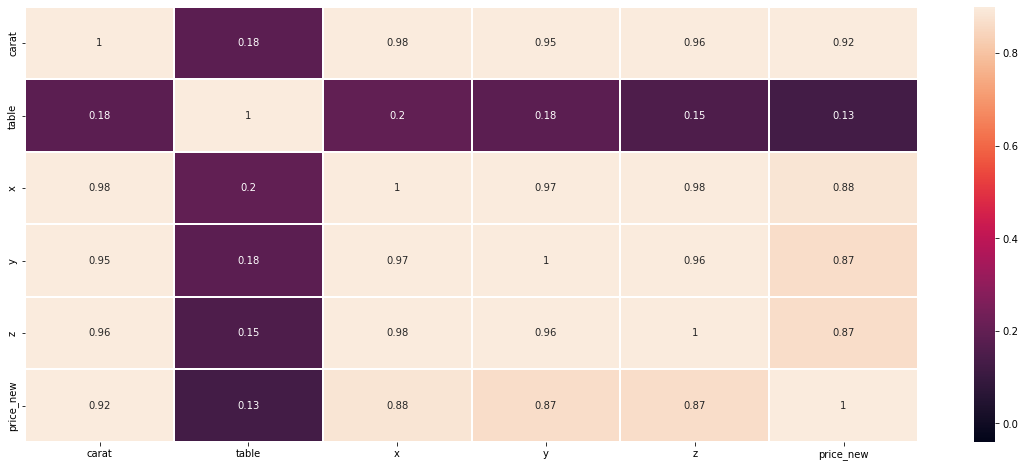

In [66]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.04,vmax=0.9,linewidth=0.2,annot=True)